In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

*__1. Study Please refer to the K means clustering implementation in ISLR text pg.  404 - 405. Generate your own data set using a similar method, but for 50 data points. Then, using Python libraries (not R) conduct the same K means clustering implementation and explain your results.__*


In [3]:
X = np.random.normal(size=(50, 2))

X[:25, 0] = X[:25, 0] + 3
X[0:25, 1] = X[:25, 1] + 3

X[25:, 0] = X[25:, 0] - 4
X[25:, 1] = X[25:, 1] - 4

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)

km = km.fit(X)

labels = km.predict(X)

centers = km.cluster_centers_

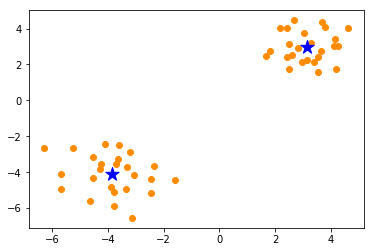

In [5]:
plt.scatter(X[:, 0], X[:, 1], c='darkorange')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='b', s=200)

_Observation:_

* The first half of the dataset is shifted to the right by adding 3 to and the rest to left by subtracting 4
* The KMeans() from Python with a n_cluster=2 calculates two centers, which are plotted on the plot above

*__2. Principal Components Analysis. Study the Principal Components Analysis tutorial.__*

*__Then conduct PCA on the modified States.XX data set.  Explain what PCA is in the context of this data set, what it does, and interpret your results.  Why is it useful?__*

In [6]:
df = pd.read_csv('statemodx77.csv')

In [7]:
# extracting numerical predictor vars to X
X = df.drop(['Unnamed: 0', 'Life Exp', 'Unnamed: 9', 'region',], axis=1)

In [8]:
# getting dummies for categorical vars
X_dummies = pd.get_dummies(df[['Unnamed: 9', 'region']], drop_first=True)

In [9]:
from sklearn.preprocessing import *

scaler = MinMaxScaler()

# normalize numerical vars
X = scaler.fit_transform(X)

In [10]:
# combining X numerical and dummies vars
X = np.hstack((X, X_dummies.values))

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
fit = pca.fit(X)

X_trans = pca.fit_transform(X)

print("Original # of predictor variables: %s" % X.shape[1])
print("Transformed # of predictor variables: %s" % X_trans.shape[1])

Original # of predictor variables: 69
Transformed # of predictor variables: 50


Text(0.5,1,'PCA Scree Plot')

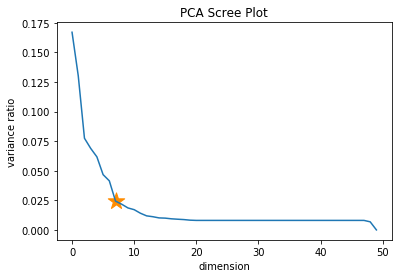

In [12]:
var_ratio = fit.explained_variance_ratio_

plt.plot(var_ratio)
plt.scatter(x=7, y=var_ratio[7], marker='*', c='darkorange', s=300)
plt.xlabel('dimension')
plt.ylabel('variance ratio')
plt.title('PCA Scree Plot')

*_Observation:_*

* The PCA reduced the number of features from 69 to 50 without any specification on n_components from the user
* The scree plot above shows that the marginal effectiveness of adding more PCA components 'elbows' around 7
* This information is useful when fitting a linear regression function to predict 'Life Exp'; instead of using all 69 features, we could simply select the 7 features and still be able to get an accurate prediction on 'Life Exp'
* Unlike LDA, PCA does NOT take y or pre-existing label into consideration when conducting dimensionality reduction

*__3. Linear Discriminants Analysis.  Study the Linear Discriminants Analysis tutorial in Python below__*
 
*__Then conduct LDA on the modified States.XX data set.  Explain what LDA is in the context of this data set, what it does, and interpret your results.  Why is it useful?__*

In [13]:
# binning life expectancy into three categories
exp_cat = pd.cut(df['Life Exp'], bins=3, labels=['short', 'normal', 'long'])

In [14]:
from sklearn.preprocessing import*

# relabel resp var for classification algorithm
y = LabelEncoder().fit(exp_cat.values).transform(exp_cat.values)
label_dict = {0:'long', 1:'normal', 2:'short'}

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# create an instance of LDA
sk_lda = LDA()

# reduce feature dimension
X_train_trans = sk_lda.fit_transform(X_train, y_train)
X_test_trans = sk_lda.transform(X_test)

# train model using reduced dimensions
sk_lda.fit(X_train_trans, y_train)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [17]:
# predict classification using transformed X_test features
y_hat = sk_lda.predict(X_test_trans)

In [18]:
print("Original # of predictor variables: %s" % X_train.shape[1])
print("Transformed # of predictor variables: %s" % X_train_trans.shape[1])

Original # of predictor variables: 69
Transformed # of predictor variables: 2


In [19]:
lda_rslt = pd.DataFrame(np.vstack((y_test, y_hat)).transpose(), columns=['y', 'y_hat'])
lda_rslt['y'] = [label_dict[i] for i in lda_rslt['y']]
lda_rslt['y_hat'] = [label_dict[i] for i in lda_rslt['y_hat']]
lda_rslt['accuracy'] = [1 if x == y else 0 for x, y in zip(lda_rslt['y'], lda_rslt['y_hat'])]

In [20]:
print(lda_rslt)
print("\nAccuracy: %f" % lda_rslt.accuracy.mean())

         y   y_hat  accuracy
0   normal  normal         1
1     long  normal         0
2     long  normal         0
3   normal  normal         1
4   normal  normal         1
5    short  normal         0
6     long  normal         0
7   normal  normal         1
8     long    long         1
9   normal  normal         1
10    long    long         1
11  normal  normal         1
12    long    long         1

Accuracy: 0.692308


*_Observation:_*

* LDA both reduces dimension and predicts classification provided that y or pre-existing labels are given
* In this case, LDA reduced the feature dimension from 69 to 2 and predicted classification as shown in table above
* However, as shown in the table, the prediction doesn't appear to be promising
* So I'll try feature transformation using PCA first and then feed that into LDA to conduct classification

*_Using PCA to reduce dimension and LDA to classify_*

In [21]:
# PCA 
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pca2, y, random_state=0)

In [23]:
sk_lda.fit(X_train, y_train)
y_hat = sk_lda.predict(X_test)

In [24]:
lda_rslt = pd.DataFrame(np.vstack((y_test, y_hat)).transpose(), columns=['y', 'y_hat'])
lda_rslt['y'] = [label_dict[i] for i in lda_rslt['y']]
lda_rslt['y_hat'] = [label_dict[i] for i in lda_rslt['y_hat']]
lda_rslt['accuracy'] = [1 if x == y else 0 for x, y in zip(lda_rslt['y'], lda_rslt['y_hat'])]

In [25]:
print(lda_rslt)
print("\nAccuracy: %f" % lda_rslt.accuracy.mean())

         y   y_hat  accuracy
0   normal  normal         1
1     long    long         1
2     long  normal         0
3   normal   short         0
4   normal  normal         1
5    short    long         0
6     long  normal         0
7   normal  normal         1
8     long    long         1
9   normal  normal         1
10    long    long         1
11  normal  normal         1
12    long    long         1

Accuracy: 0.692308


*_Observation:_*

* In this case, the using a combination of PCA and LDA yielded the same results as using LDA alone.

*_Observation:_*

* Like PCA, LDA reduces the # of features in the dataset; however, LDA requires the input of y or pre-existing label as the algorithm takes into consideration pre-existing labels when evaluating useful features to keep

* LDA reduces the dimensionality from 69 to 2 and then makes prediction about the class using transformed X_test 

*__4. Conceptual Question: ISLR Chapter 5 page 198 Answer Question #3__*

*__(a) Explain how k-fold cross-validation is implemented.__*

This method randomly divides the set of observations into k groups or sets of approximately equal size.  The first set is treated as a validation set, and the rest are used to train model. The first MSE is computed using the first held-out or validation set.  The procedure is then repeated k times with each holding out a different fold/set of data for validation.  The process eventually produces k estimates of the test error, and the k-fold CV estimate is computed by averaging all k estimates of the test error.

*__(b) What are the advantages and disadvantages of k-fold cross-validation relative to:__*

*__i. The validation set approach?__*

The validation set approach is simple to implement and not as computationally intensive as LOOCV because we only need to divide up the whole set into two subsets of equal/similar size.  That means we only need to repeat the process twice.  However, the flip side of validation set approach is that validation error by this approach tends to overestimate the test error for the model fit on the entire data set; in addition the errors also tend to be highly variable each time when it's performed because of the randomness of the training data and validation data.

*__ii. LOOCV?__*

LOOCV has far less bias and tends not to overestimate the test error as much as the validation set approach.  In addition, unlike the validation set approach, LOOCV doesn't yield highly different results when the procedure is performed repeatedly as it doesn't suffer from the randomness of traning/validation set splits.  In fact, performing LOOCV will always yield the same results as there's no randomness in the training/validation set splits. However, all of these benefits do come with a cost, and that is the computational cost, which has the potential to be expensive to implement.  And this is especially of concern when the data set is large.